In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [133]:
# generating synthetic data
from sklearn.datasets import make_classification

In [134]:
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

In [135]:
X,y

(array([[-2.00211818,  0.29106954],
        [-1.57755326,  0.59660094],
        [ 1.10755574, -2.23200728],
        ...,
        [ 0.0995701 ,  0.9609932 ],
        [ 1.19189011, -1.10016497],
        [ 0.72613945, -0.89152694]]),
 array([1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
        0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
        1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
        0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
        0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
        0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
        0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
        1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
        1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
        0, 1, 0, 1, 1, 1, 0, 

<Axes: xlabel='0', ylabel='1'>

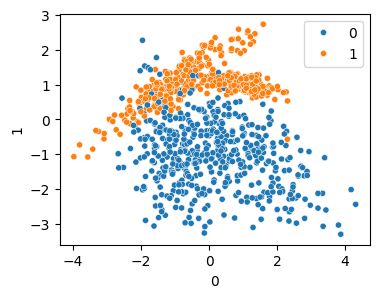

In [136]:
df = pd.DataFrame(X)

plt.figure(figsize=(4, 3))  # width=6 inches, height=4 inches
sns.scatterplot(x=df[0], y=df[1], hue=y, s=20)


##### Splitting training and testing data

In [137]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [138]:
from sklearn.metrics import classification_report,confusion_matrix

def evaluation_metrics(test,pred):
    print("Classfication Report: {}".format(classification_report(test,pred)))
    print("Confusion Matrix: {}".format(confusion_matrix(test,pred)))

    cm = confusion_matrix(test, pred)

    # Plot it using seaborn heatmap
    plt.figure(figsize=(4, 2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


In [139]:
from sklearn.svm import SVC

##### Using Linear kernel

Classfication Report:               precision    recall  f1-score   support

           0       0.96      0.89      0.92       134
           1       0.88      0.96      0.92       116

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

Confusion Matrix: [[119  15]
 [  5 111]]


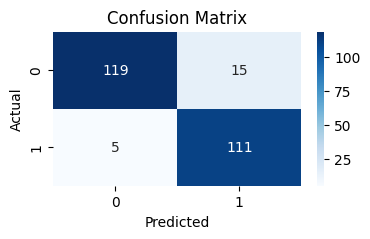

In [140]:
svc_linear=SVC(kernel='linear')
svc_linear.fit(X=X_train,y=y_train)
y_pred=svc_linear.predict(X=X_test)
evaluation_metrics(y_test,y_pred)

##### Using RBF kernel

Classfication Report:               precision    recall  f1-score   support

           0       1.00      0.91      0.95       134
           1       0.91      1.00      0.95       116

    accuracy                           0.95       250
   macro avg       0.95      0.96      0.95       250
weighted avg       0.96      0.95      0.95       250

Confusion Matrix: [[122  12]
 [  0 116]]


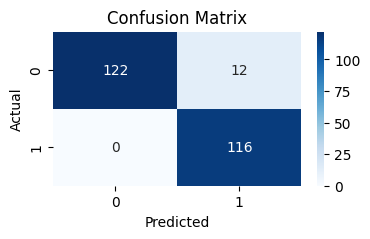

In [141]:
svc_rbf=SVC(kernel='rbf')
svc_rbf.fit(X=X_train,y=y_train)
y_pred1=svc_rbf.predict(X=X_test)
evaluation_metrics(y_test,y_pred1)

##### Using Polynomial kernel

Classfication Report:               precision    recall  f1-score   support

           0       0.96      0.91      0.93       134
           1       0.90      0.96      0.93       116

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250

Confusion Matrix: [[122  12]
 [  5 111]]


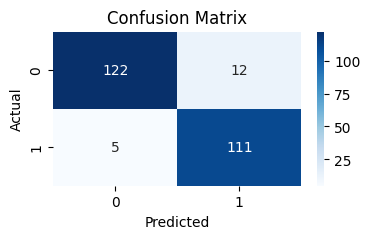

In [142]:
svc_poly=SVC(kernel='poly')
svc_poly.fit(X=X_train,y=y_train)
y_pred2=svc_poly.predict(X=X_test)
evaluation_metrics(y_test,y_pred2)

##### HyperParameterTuning

In [143]:
from sklearn.model_selection import GridSearchCV

params_grid={
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['rbf']
}

grid_search=GridSearchCV(SVC(),param_grid=params_grid,cv=5,verbose=3)

In [144]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.960 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.880 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

Classfication Report:               precision    recall  f1-score   support

           0       1.00      0.93      0.96       134
           1       0.92      1.00      0.96       116

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250

Confusion Matrix: [[124  10]
 [  0 116]]


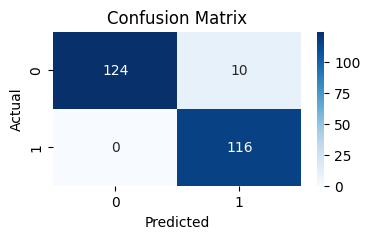

In [145]:
y_pred3=grid_search.predict(X_test)
evaluation_metrics(y_test,y_pred3)

In [146]:
grid_search.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}